In [26]:
import os
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

WORKING_DIR = './images/train/'

def read_image(image_path):
    files = os.listdir(image_path)
    images = []
    
    for fi in files:
        if fi[-4:] == '.jpg':
            image = imread(os.path.join(image_path, fi))
            images.append(image)
        
    return np.array(images)

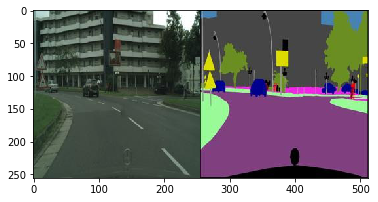

In [27]:
all_images = read_image(WORKING_DIR)
plt.imshow(all_images[0])

In [29]:
def cut_images(all_images):
    new_images = []
    masks = []
    
    for image in all_images:
        if image.shape == (256, 512, 3):
            newImage = image[:, 0:256, :]
            oldmask = image[:, 256:512, :]
            
            mask = handle_mask(oldmask, [128, 63, 127]) + handle_mask(oldmask, [70, 70, 70])
            
            new_images.append(newImage)
            masks.append(mask)
            
    return np.array(new_images), np.array(masks)

def handle_mask(mask, target):
    
    if (mask.shape == (256, 256, 3)):
        threshold = 30
        
        lb = np.array(target, dtype=np.uint8, ndmin=1) - threshold
        ub = np.array(target, dtype=np.uint8, ndmin=1) + threshold
        
        
        mask = cv.inRange(mask, lb, ub)[..., np.newaxis]
        
    return np.where(mask > 0, target, [0, 0, 0])

new_images, masks = cut_images(all_images)


for i in range(new_images.shape[0]):
    cv.imwrite(WORKING_DIR + 'img' + str(i) + '.jpg', new_images[i])
    cv.imwrite(WORKING_DIR + 'mask_mt/' + str(i) + '.jpg', masks[i])